# How Do We Design a Good Online Course for Business Analytics
***
* What are the features of Business Analytics online course?
* How are the course content introduced?
* How are the instructor introduced?
* What are the factors impacting the enrollments of the Business Analytics online course?

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
data = pd.read_pickle("../ETL/data_final.pkl")
data.head()

,price,original_price,lectures,hours,level,enrollment,rating,num_ratings,five_stars,four_stars,three_stars,two_stars,downloadable_resources,instructor_no_courses,descr_LDA_0,descr_LDA_1,descr_LDA_2,descr_LDA_3,descr_LDA_4,descr_LDA_5,descr_LDA_6,descr_LDA_7,descr_LDA_8,descr_LDA_9,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
0,25.99,179.99,83,9.0,All Levels,342288.0,4.7,91772.0,0.60,0.33,0.06,0.01,14.0,31.0,0.034318,0.950584,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.140185,0.703021,0.073783,0.071684,0.0,0.0,0.0,0.0,0.0,0.0
1,16.99,124.99,82,9.0,All Levels,231631.0,4.6,61533.0,0.60,0.33,0.06,0.01,6.0,48.0,0.078587,0.907617,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.943746,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,12.99,94.99,275,23.5,Beginner,148077.0,4.6,43339.0,0.54,0.38,0.07,0.01,26.0,35.0,0.986360,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.130506,0.834705,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,19.99,139.99,117,11.0,All Levels,109303.0,4.6,30899.0,0.61,0.33,0.06,0.01,14.0,3.0,0.036034,0.180143,0.774481,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.233460,0.740728,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,12.99,94.99,413,20.5,All Levels,136869.0,4.5,28595.0,0.52,0.37,0.10,0.01,151.0,68.0,0.436678,0.136041,0.194326,0.224129,0.0,0.0,0.0,0.0,0.0,0.0,0.978047,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.describe()


,price,original_price,lectures,hours,enrollment,rating,num_ratings,five_stars,four_stars,three_stars,two_stars,downloadable_resources,instructor_no_courses,descr_LDA_0,descr_LDA_1,descr_LDA_2,descr_LDA_3,descr_LDA_4,descr_LDA_5,descr_LDA_6,descr_LDA_7,descr_LDA_8,descr_LDA_9,instr_LDA_0,instr_LDA_1,instr_LDA_2,instr_LDA_3,instr_LDA_4,instr_LDA_5,instr_LDA_6,instr_LDA_7,instr_LDA_8,instr_LDA_9
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,15.971403,66.950507,52.036816,5.485572,5784.926368,4.071940,805.666667,0.420139,0.308716,0.138448,0.038736,7.475622,102.334328,0.518564,0.313582,0.095021,0.018787,0.006306,0.004120,0.003920,0.021706,0.002288,0.003109,0.726618,0.141167,0.041422,0.019147,0.007411,0.005788,0.006010,0.005528,0.010371,0.006542
std,17.074501,38.322610,50.944052,5.888027,21278.709134,0.849577,4410.404111,0.203599,0.159422,0.116401,0.072657,14.553126,339.187340,0.365521,0.313047,0.193330,0.085440,0.048661,0.036304,0.039994,0.109733,0.016074,0.029978,0.336015,0.235873,0.116980,0.086771,0.046049,0.033199,0.032669,0.026474,0.059923,0.036541
min,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.990000,24.990000,22.000000,2.000000,101.000000,3.900000,17.000000,0.320000,0.250000,0.070000,0.000000,1.000000,2.000000,0.160904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.439308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.990000,79.990000,37.000000,3.500000,663.000000,4.300000,64.000000,0.440000,0.330000,0.120000,0.020000,3.000000,7.000000,0.482334,0.220140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.957128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.990000,94.990000,64.000000,6.500000,3145.000000,4.500000,277.000000,0.540000,0.390000,0.190000,0.050000,8.000000,24.000000,0.967842,0.558224,0.066409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.969991,0.214471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,199.990000,199.990000,525.000000,67.500000,342288.000000,5.000000,91772.000000,1.000000,1.000000,1.000000,1.000000,154.000000,1420.000000,0.995311,0.977247,0.915600,0.871914,0.819914,0.774944,0.819959,0.887470,0.423173,0.699913,0.992436,0.935048,0.773070,0.887480,0.871393,0.849961,0.628528,0.549750,0.549992,0.819829


* Define dependent variable and independent variables

## Data Exploration
* Enrollment

Text(0.5, 0, 'Enrolloment')

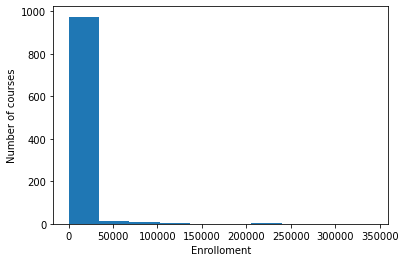

In [4]:
plt.hist(data["enrollment"],  bins=10)
plt.ylabel("Number of courses")
plt.xlabel('Enrolloment')

Text(0.5, 0, 'Enrollments (Log-transformed)')

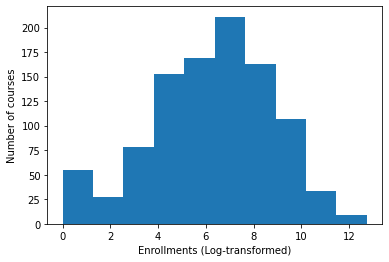

In [5]:
data["enrollment"] = data["enrollment"].apply(lambda x: np.log(x+1))
# enrollment_scaler = MinMaxScaler(feature_range=(-1, 1))
# data["enrollment"] = enrollment_scaler.fit_transform(data["enrollment"].values.reshape(-1,1))
plt.hist(data["enrollment"], bins=10)
plt.ylabel('Number of courses')
plt.xlabel('Enrollments (Log-transformed)')

* Price

(array([959.,  19.,   8.,   3.,   8.,   0.,   2.,   1.,   1.,   4.]),
 array([  0.   ,  19.999,  39.998,  59.997,  79.996,  99.995, 119.994,
        139.993, 159.992, 179.991, 199.99 ]),
 <BarContainer object of 10 artists>)

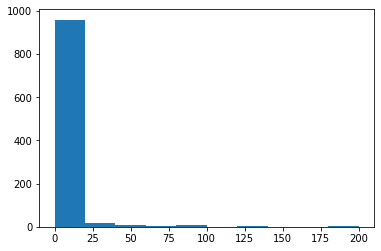

In [6]:
plt.hist(data["price"],  bins=10)

(array([ 31.,   0.,   0.,   0., 687., 244.,  14.,  11.,  10.,   8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

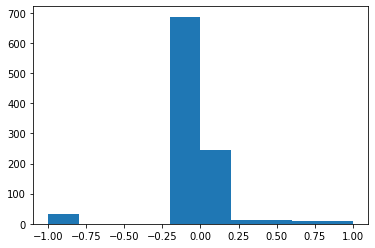

In [7]:
data["price"] = data["price"].apply(lambda x: np.log(x+1))
data["price"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["price"].values.reshape(-1,1))
plt.hist(data["price"], bins=10)

* Original_price

(array([211., 143., 105.,  51., 375.,  73.,  37.,   4.,   2.,   4.]),
 array([  0.   ,  19.999,  39.998,  59.997,  79.996,  99.995, 119.994,
        139.993, 159.992, 179.991, 199.99 ]),
 <BarContainer object of 10 artists>)

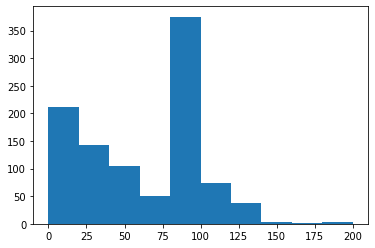

In [8]:
plt.hist(data["original_price"],  bins=10)

(array([ 31.,   0.,   0.,   0., 687., 244.,  14.,  11.,  10.,   8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

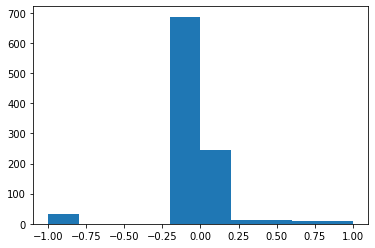

In [9]:
# data["original_price"] = data["original_price"].apply(lambda x: np.log(x+1))
data["original_price"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["original_price"].values.reshape(-1,1))
plt.hist(data["price"], bins=10)

* lectures

(array([701., 213.,  56.,  16.,   8.,   6.,   1.,   2.,   1.,   1.]),
 array([  5.,  57., 109., 161., 213., 265., 317., 369., 421., 473., 525.]),
 <BarContainer object of 10 artists>)

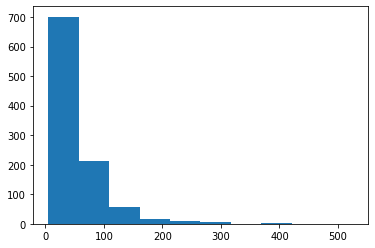

In [10]:
plt.hist(data["lectures"],  bins=10)

(array([ 31.,  73., 138., 211., 243., 160.,  95.,  35.,  14.,   5.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

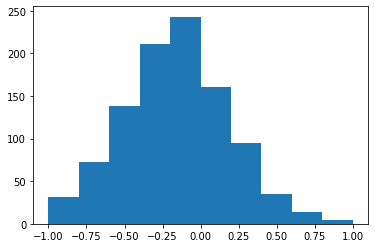

In [11]:
data["lectures"] = data["lectures"].apply(lambda x: np.log(x+1))
data["lectures"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["lectures"].values.reshape(-1,1))
plt.hist(data["lectures"], bins=10)


* hours

(array([802., 135.,  45.,  10.,   6.,   4.,   1.,   1.,   0.,   1.]),
 array([ 1.  ,  7.65, 14.3 , 20.95, 27.6 , 34.25, 40.9 , 47.55, 54.2 ,
        60.85, 67.5 ]),
 <BarContainer object of 10 artists>)

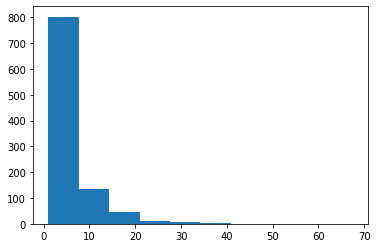

In [12]:
plt.hist(data["hours"],  bins=10)

(array([193., 266., 156., 164., 115.,  55.,  37.,  12.,   5.,   2.]),
 array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -1.11022302e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01,  1.00000000e+00]),
 <BarContainer object of 10 artists>)

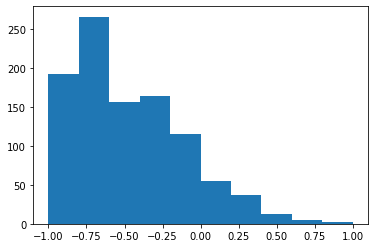

In [13]:
data["hours"] = data["hours"].apply(lambda x: np.log(x+1))
data["hours"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["hours"].values.reshape(-1,1))
plt.hist(data["hours"], bins=10)

* rating

(array([ 30.,   0.,   0.,   3.,   2.,  18.,  43., 172., 417., 320.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

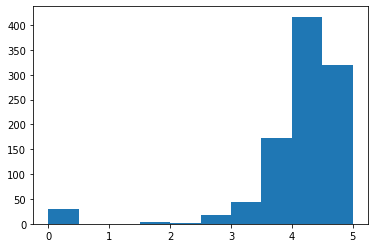

In [14]:
plt.hist(data["rating"],  bins=10)

(array([ 30.,   0.,   0.,   3.,   2.,  18.,  43., 172., 417., 320.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

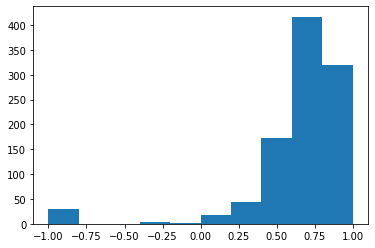

In [15]:
# data["rating"] = data["rating"].apply(lambda x: np.log(x+1))
data["rating"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["rating"].values.reshape(-1,1))
plt.hist(data["rating"], bins=10)

* downloadable_resources

(array([877.,  78.,  31.,   7.,   2.,   2.,   4.,   0.,   2.,   2.]),
 array([  0. ,  15.4,  30.8,  46.2,  61.6,  77. ,  92.4, 107.8, 123.2,
        138.6, 154. ]),
 <BarContainer object of 10 artists>)

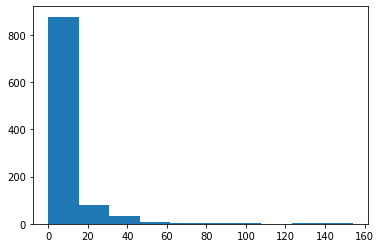

In [16]:
plt.hist(data["downloadable_resources"],  bins=10)

(array([155., 231., 179., 147., 102.,  94.,  61.,  24.,   4.,   8.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

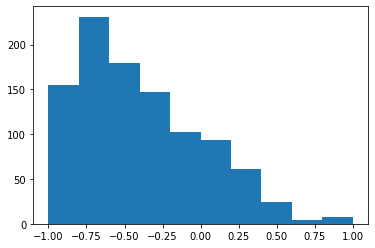

In [17]:
data["downloadable_resources"] = data["downloadable_resources"].apply(lambda x: np.log(x+1))
data["downloadable_resources"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["downloadable_resources"].values.reshape(-1,1))
plt.hist(data["downloadable_resources"], bins=10)

* instructor_no_courses

(array([937.,   1.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,  62.]),
 array([   0.,  142.,  284.,  426.,  568.,  710.,  852.,  994., 1136.,
        1278., 1420.]),
 <BarContainer object of 10 artists>)

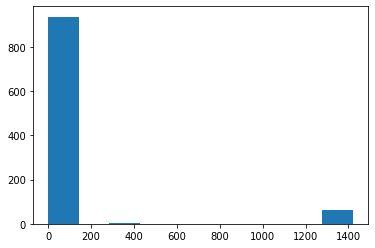

In [18]:
plt.hist(data["instructor_no_courses"],  bins=10)

(array([192., 156., 188., 174., 117.,  93.,  17.,   6.,   0.,  62.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

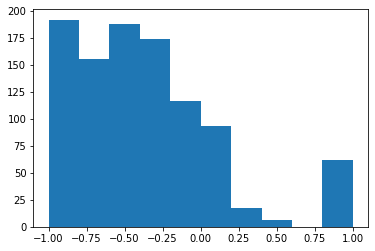

In [19]:
data["instructor_no_courses"] = data["instructor_no_courses"].apply(lambda x: np.log(x+1))
data["instructor_no_courses"] = MinMaxScaler(feature_range=(-1, 1)).fit_transform(data["instructor_no_courses"].values.reshape(-1,1))
plt.hist(data["instructor_no_courses"], bins=10)

* Process categorical data


In [20]:
dummy = pd.get_dummies(data["level"])

In [21]:
data = pd.concat([data,dummy],axis = 1)
data.drop(["level"],axis = 1, inplace=True)


In [22]:
y = data["enrollment"]
X = data.drop(["enrollment","num_ratings"],axis = 1)

## Regression Models

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

* A function to calculate Root Mean Squared Logarithmic Error (RMSLE)


In [24]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

### Ridge Regression

In [25]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=0.9, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=666, tol=0.00001)
model.fit(X_train, y_train)

Ridge(alpha=0.9, max_iter=1000, random_state=666, tol=1e-05)

In [26]:
y_pred = model.predict(X=X_test)
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)
v_rmsle = rmsle(y_true.values, y_pred)
print("Ridge- RMSLE error on test dataset: "+str(v_rmsle))

Ridge- RMSLE error on test dataset: 2.021496763033342


### Lasso Regression

In [27]:
from sklearn.linear_model import Ridge, Lasso
model = Lasso(alpha=0.1, fit_intercept=True, max_iter=10000,
   normalize=False, precompute=False, random_state=666,
   selection='random', tol=0.00001)
model.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000, random_state=666, selection='random',
      tol=1e-05)

In [28]:
y_pred = model.predict(X=X_test)
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)
v_rmsle = rmsle(y_true.values, y_pred)
print("Lasso- RMSLE error on test dataset: "+str(v_rmsle))

Lasso- RMSLE error on test dataset: 2.1557520099377787


### Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [35]:
y_pred = model.predict(X=X_test)
y_pred = np.expm1(y_pred)
y_true = np.expm1(y_test)
v_rmsle = rmsle(y_true.values, y_pred)
print("Decision Tree Regression- RMSLE error on test dataset: "+str(v_rmsle))

Decision Tree Regression- RMSLE error on test dataset: 1.5875228458514534


In [36]:
for feature, importance in zip(X.columns,model.feature_importances_):
    print(feature, importance)

price 0.0
original_price 0.0
lectures 0.029141031020865786
hours 0.0
rating 0.0
five_stars 0.06699101518945245
four_stars 0.006111870442173712
three_stars 0.6356907963109855
two_stars 0.22888016127689442
downloadable_resources 0.005563376492538135
instructor_no_courses 0.004834080150089627
descr_LDA_0 0.0
descr_LDA_1 0.00012595410699399616
descr_LDA_2 0.001318428927052879
descr_LDA_3 0.0
descr_LDA_4 0.0
descr_LDA_5 0.0
descr_LDA_6 0.0
descr_LDA_7 0.0
descr_LDA_8 0.0
descr_LDA_9 0.0
instr_LDA_0 0.017114488277306418
instr_LDA_1 0.0
instr_LDA_2 0.0
instr_LDA_3 0.0
instr_LDA_4 0.0
instr_LDA_5 0.0
instr_LDA_6 0.0
instr_LDA_7 0.0
instr_LDA_8 0.004228797805647043
instr_LDA_9 0.0
All Levels 0.0
Beginner 0.0
Expert 0.0
Intermediate 0.0


***
Discussion:
* Among the three regressions used in this study, the decision tree regression model shows the high accuracy.
* The variables that have importance in the regression are lectures, five_stars, four_stars, three_stars, two stars, downloadable_resources, instructor_no_courses, descr_LDA_1, descr_LDA_2, instr_LDA_0, and instr_LDA_8.
* Key words of descr_LDA 1: custom, inform, descript, interview, market, requir, analyt, show, chain, insur
* Key words of descr_LDA 2: curso, power, bi, descript, requir, show, dato, aprend, b, sico
* Key words of instr_LDA_0: scienc, cours, univers, show, market, technolog, analyt, experi, team, year
* Key words of instr_LDA_8: jeff, year, step, program, technolog, workforc, industri, null, analyt, time
* The above four topics can be interpreted as: job market and customer, spanish, instructor in university, and many years of experience of instructor.   
***

### OLS Regression
* Use OLS model to check the impacts of independent variables on the dependent variable (enrollment number).

In [37]:
import statsmodels.api as sm

In [38]:
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

In [40]:
print(fii.summary())

                                 OLS Regression Results                                
Dep. Variable:             enrollment   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                              302.8
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                        0.00
Time:                        19:12:25   Log-Likelihood:                         -2100.1
No. Observations:                1005   AIC:                                      4270.
Df Residuals:                     970   BIC:                                      4442.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

***
Discussion
* The variables, including original_price, lectures, five_stars, four_stars, three_stars, two stars, and downloadable_resources, show significant impact on the dependent variable.
* The significant variables are partially different from the important variables in the decision tree regression model.
* From the coefficients of the independent variables, the original_price, lectures, five_stars, four_stars, three_stars, two stars, and downloadable_resources all have positive impact on the enrollment number.
* Hence, We can increase the original price, lecture numbers, and downloadable resources to promote the enrollment of the course.

***

